In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS

In [120]:
dataset = pd.read_csv('Airbnb_Open_Data.csv')
dataset

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [121]:
dataset.shape

(102599, 26)

In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [123]:
dataset.shape

(102599, 26)

In [124]:
dataset.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [125]:
dataset.drop(['license'], axis = 1, inplace = True)

In [126]:
dataset.dropna(inplace = True)

In [127]:
dataset.isnull().sum()

id                                0
NAME                              0
host id                           0
host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
house_rules                       0
dtype: int64

In [128]:
dataset.shape

(39627, 25)

In [129]:
dataset.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,3.962700e+04,3.962700e+04,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000,39627.000000
mean,2.713477e+07,4.918746e+10,40.727764,-73.950358,2012.515911,6.054660,28.711914,1.349871,3.222046,4.771242,135.190577
std,1.855828e+07,2.845609e+10,0.055579,0.047700,5.742591,35.928345,44.240679,1.651687,1.320276,23.218852,132.663625
min,1.001254e+06,1.236005e+08,40.506410,-74.244420,2003.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.132299e+07,2.462604e+10,40.688430,-73.982080,2008.000000,1.000000,3.000000,0.190000,2.000000,1.000000,3.000000
50%,2.107855e+07,4.890323e+10,40.721580,-73.954190,2012.000000,2.000000,10.000000,0.680000,3.000000,1.000000,90.000000
75%,4.733710e+07,7.374241e+10,40.763040,-73.933755,2018.000000,4.000000,35.000000,2.000000,4.000000,2.000000,251.000000
max,5.735803e+07,9.875746e+10,40.913060,-73.712990,2022.000000,5645.000000,629.000000,58.500000,5.000000,327.000000,426.000000


In [130]:
#General Information
#1) What is the total number of entries in the dataset?
dataset.shape

(39627, 25)

In [131]:
#2) What time range does the dataset cover?
print("The time range from {} to {}".format(dataset['Construction year'].min(),dataset['Construction year'].max()))

The time range from 2003.0 to 2022.0


In [132]:
#3) How many unique hosts are there?
uniqueName = dataset['host name'].unique()
uniqueNameDF = pd.DataFrame(uniqueName)
uniqueNameDF

,0
0,Madaline
1,Jenna
2,Lyndon
3,Michelle
4,Emma
...,...
7552,Ketia
7553,Princess-Wynona
7554,Minh
7555,Dier


So out of 102599 rows of host name there are 7557 unique host names present

In [133]:
#4) How many different countries are represented in the dataset?
dataset['country'].unique()

array(['United States'], dtype=object)

There is only one country represented in the dataset

In [134]:
#5) What is the salary distribution in the dataset?
dataset['price'].str.replace('$','').str.replace(',','').astype(float).mean()

623.5804123451182

Mean of salary in the dataset is $624

In [135]:
#Host-related Analysis:
#1) What is the distribution of host identity verification status?
dataset['host_identity_verified'].value_counts()

verified       19950
unconfirmed    19677
Name: host_identity_verified, dtype: int64

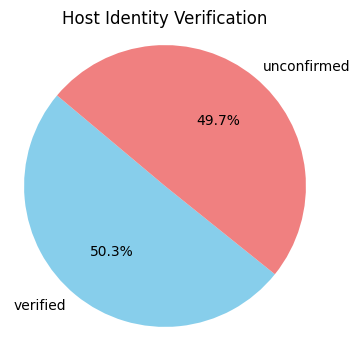

In [136]:
value_counts = dataset['host_identity_verified'].value_counts()

# Create a pie chart
plt.figure(figsize = (4,4))
plt.pie(value_counts, 
        labels = value_counts.index, 
        autopct='%1.1f%%', 
        startangle = 140, 
        colors = ['skyblue', 'lightcoral'])
plt.title('Host Identity Verification')
plt.axis('equal') #Equal aspect ratio ensures the pie chart is circular.
plt.show()

It shows that 49.7% are unverified host and 50.3% verified 

In [137]:
#2) Which neighborhoods have the highest number of hosts?
result = dataset.groupby('neighbourhood')['host name'].count()
sorted_result = result.sort_values(ascending = False)
sorted_resultDF = pd.DataFrame(sorted_result)
sorted_resultDF

,host name
neighbourhood,
Bedford-Stuyvesant,3261
Williamsburg,3182
Harlem,2279
Bushwick,1995
Hell's Kitchen,1534
...,...
"Bay Terrace, Staten Island",1
New Springville,1
Co-op City,1


Bedford-Stuyvesant has the highest number of host followed by Wiliamsburg

In [138]:
#3) What is the average number of listings per host?
dataset['calculated host listings count'].mean()

4.771241830065359

In [139]:
#4) Are the hosts who frequently offer instant bookable accommodations?
book = dataset['instant_bookable'].value_counts()
bookDF = pd.DataFrame(book)
bookDF.columns = ['count']
bookDF

,count
False,19907
True,19720


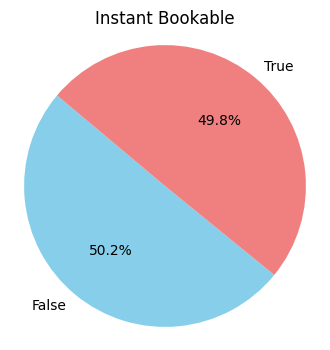

In [140]:
# create pie chart 
plt.figure(figsize = (4,4))
plt.pie(bookDF['count'],
       labels = bookDF.index,
       autopct='%1.1f%%',
       startangle=140,
       colors=['skyblue','lightcoral'])
plt.title('Instant Bookable')
plt.axis('equal')
# Equal aspect ratio ensures the pie chart is circular
plt.show()

There are 49.8% host who perform instant booking and 50.2% are those who don't

In [141]:
#5) What is the most common cancellation policy among host?
cancellation_policy = dataset['cancellation_policy'].value_counts()
cancellation_policyDF = pd.DataFrame(cancellation_policy)
cancellation_policyDF.columns = ['count']
cancellation_policyDF

,count
moderate,13313
strict,13247
flexible,13067


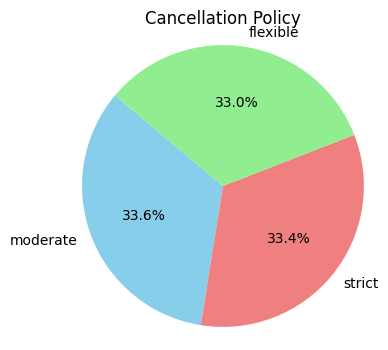

In [142]:
# Create a pie chart
plt.figure(figsize = (4,4))
plt.pie(cancellation_policyDF['count'],
       labels = cancellation_policyDF.index,
       autopct = '%1.1f%%',
       startangle=140,
       colors=['skyblue','lightcoral','lightgreen'])
plt.title('Cancellation Policy')
plt.axis('equal') # Equal aspect ratio ensires the pie chart circular
plt.show()

The moderate cancellation policy is the most common one with a 33.5%

# Accomodation-related Analysis:

### 1) What are the different types of room listing available?

In [143]:
room = dataset['room type'].value_counts()
roomDF = pd.DataFrame(room)
roomDF

,room type
Entire home/apt,20215
Private room,18579
Shared room,833


There are more of Entire home/apt and the least ones are hotel room 

#### Create a bar graph with labels

<Figure size 800x600 with 0 Axes>

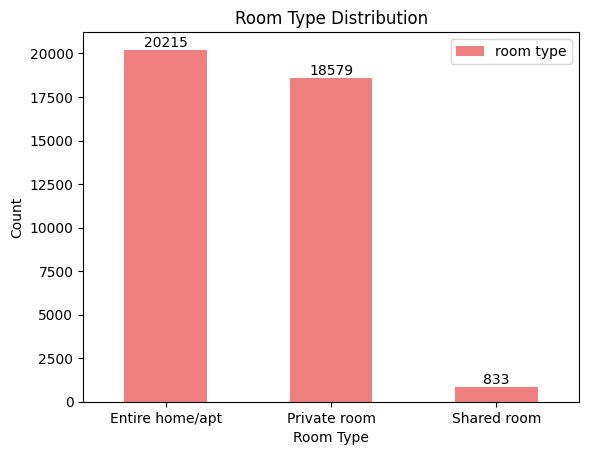

In [144]:
plt.figure(figsize = (8,6))
ax = roomDF.plot(kind='bar', color = 'lightcoral')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### 2) How does the distribution of accommodation prices vary across different neighborhoods?

In [145]:
dist = dataset.groupby('neighbourhood')['price'].count()
distDF = pd.DataFrame(dist)
distDF.columns = ['count']
sorted_distDF = distDF.sort_values(by='count', ascending=False)
sorted_distDF

,count
neighbourhood,
Bedford-Stuyvesant,3261
Williamsburg,3182
Harlem,2279
Bushwick,1995
Hell's Kitchen,1534
...,...
"Bay Terrace, Staten Island",1
New Springville,1
Co-op City,1


### 3) Are there accomodations with significantly higher service fees compared to others?

In [146]:
service = dataset.groupby('neighbourhood')['service fee'].max()
serviceDF = pd.DataFrame(service)
serviceDF.columns = ['maxval']
serviceDF.sort_values(by='maxval', ascending=False)

,maxval
neighbourhood,
Crown Heights,$99
East Village,$99
Upper East Side,$99
Canarsie,$99
Little Italy,$99
...,...
Morrisania,$172
Holliswood,$136
"Bay Terrace, Staten Island",$12


In [147]:
room = dataset.groupby('room type')['service fee'].max()
roomDF = pd.DataFrame(room)
roomDF.columns = ['maxva']
roomDF

,maxva
room type,
Entire home/apt,$99
Private room,$99
Shared room,$99


### 4) What is the average construction year of the listed properties?

In [148]:
dataset['Construction year'].mean().round()

2013.0

## Geographical Analysis:

## 1) Are they any countries with a notably high concentration of listings?

There is only one country USA with highest concentration 

### 5) How does the availability of accommodations (availability 365) vary across neighborhoods?

In [149]:
neigh = dataset.groupby('neighbourhood')['room type'].value_counts()
neighDF = pd.DataFrame(neigh)
neighDF

room type
neighbourhood room type                 
Allerton      Entire home/apt         19
              Private room            15
Arden Heights Entire home/apt          3
              Private room             2
Arrochar      Entire home/apt         12
...                                  ...
Woodlawn      Private room             9
              Entire home/apt          3
              Shared room              2
Woodside      Private room           127
              Entire home/apt         52

[494 rows x 1 columns]

### 6) Are the any correlation between latitude/longitude and price?

In [150]:
dataset['lat'].corr(dataset['price'].str.replace('$','').str.replace(',','').astype(float))

-0.006385973662251253

In [151]:
dataset['long'].corr(dataset['price'].str.replace('$','').str.replace(',','').astype(float))

-0.007423356934498829

## Regulations and Compliance:

### 1) How many listing have specified hous rules?

In [152]:
rules = dataset.groupby('room type')['house_rules'].count()
rulesDF = pd.DataFrame(rules)
rulesDF.columns = ['count']
rulesDF

,count
room type,
Entire home/apt,20215
Private room,18579
Shared room,833


## Price Analysis:

### 1) What is the distribution of price for different room types?

In [153]:
rtype = dataset.groupby('room type')['price'].count()
rtypeDF = pd.DataFrame(rtype)
rtypeDF.columns = ['count']
rtypeDF

,count
room type,
Entire home/apt,20215
Private room,18579
Shared room,833


### 2) Are there any patterns in term of minimum nights based on room types or neighborhoods group?

In [154]:
dataset.groupby('room type')['minimum nights'].mean()

room type
Entire home/apt    7.294385
Private room       4.788794
Shared room        4.202881
Name: minimum nights, dtype: float64

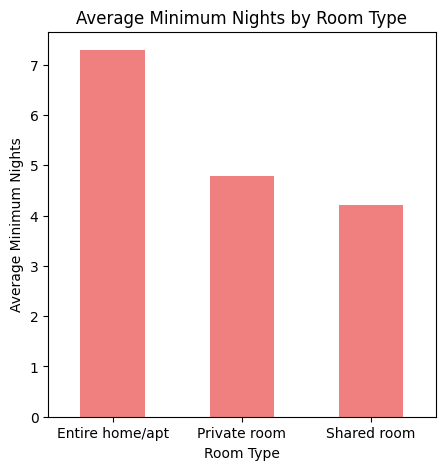

In [155]:
grouped_by_room = dataset.groupby('room type')['minimum nights'].mean()

# Create a bar graph
plt.figure(figsize = (5,5))
grouped_by_room.plot(kind='bar', color='lightcoral')
plt.title('Average Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=0)
plt.show()

In [156]:
dataset.groupby('neighbourhood group')['minimum nights'].mean()

neighbourhood group
Bronx            4.060150
Brooklyn         5.692207
Manhattan        7.117275
Queens           4.231675
Staten Island    3.171745
Name: minimum nights, dtype: float64

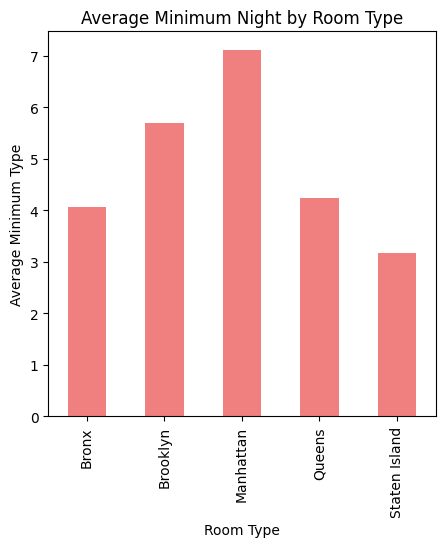

In [157]:
grouped_by_room = dataset.groupby('neighbourhood group')['minimum nights'].mean()

# Create a bar graph
plt.figure(figsize=(5,5))
grouped_by_room.plot(kind='bar', color='lightcoral')
plt.title('Average Minimum Night by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Type')
plt.show()

## Geographical Analysis:

### 1) Do accommodations in certain neightborhoods tend to have more in stant bookable options?

In [158]:
instant = dataset.groupby(['neighbourhood group','room type'])['instant_bookable'].value_counts()
instantDF = pd.DataFrame(instant)
instantDF

instant_bookable
neighbourhood group room type       instant_bookable                  
Bronx               Entire home/apt True                           169
                                    False                          150
                    Private room    True                           283
                                    False                          281
                    Shared room     True                            28
                                    False                           20
Brooklyn            Entire home/apt False                         4060
                                    True                          4031
                    Private room    False                         4231
                                    True                          4141
                    Shared room     True                           152
                                    False                          130
Manhattan           Entire home/apt True                          4936
                                    False                         4888
                    Private room    False                         3315
                                    True                          3242
                    Shared room     False                          193
                                    True                           173
Queens              Entire home/apt False                          963
                                    True                           853
                    Private room    True                          1456
                                    False                         1438
                    Shared room     False                           69
                                    True                            64
Staten Island       Entire home/apt True                            88
                                    False                           77
                    Private room    True                           102
                                    False                           90
                    Shared room     False                            2
                                    True                             2

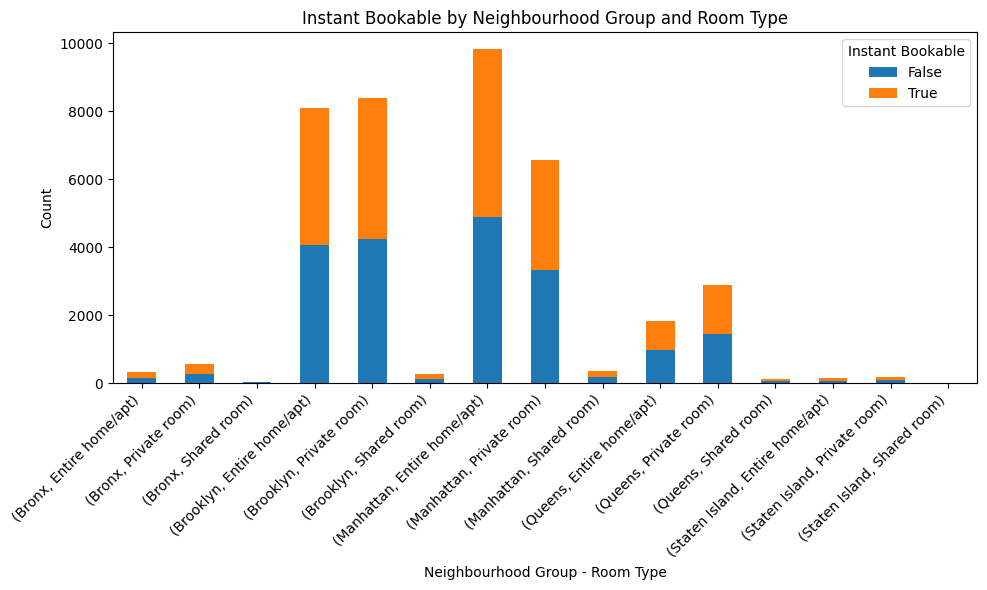

In [159]:
instant = dataset.groupby(['neighbourhood group','room type','instant_bookable'])['instant_bookable'].count()
instantDF = pd.DataFrame(instant)
instantDF.columns = ['count']

# Pivot the DataFrame for better visualization
instant_pivot = instantDF.pivot_table(index=['neighbourhood group','room type'], columns='instant_bookable', values='count', fill_value=0)

# Create stacked bar charts
ax = instant_pivot.plot(kind = 'bar', stacked=True, figsize=(10, 6))
plt.title('Instant Bookable by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group - Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Instant Bookable')
plt.tight_layout()
plt.show()

In [160]:
#Temporal Analysis
#1) How do price vary seasonally in term of years
dataset.groupby('Construction year')['price'].count()

Construction year
2003.0    1901
2004.0    1892
2005.0    1998
2006.0    2047
2007.0    1942
2008.0    2041
2009.0    2028
2010.0    2038
2011.0    1957
2012.0    1990
2013.0    1880
2014.0    2009
2015.0    2098
2016.0    1916
2017.0    1954
2018.0    1946
2019.0    2096
2020.0    1984
2021.0    1998
2022.0    1912
Name: price, dtype: int64

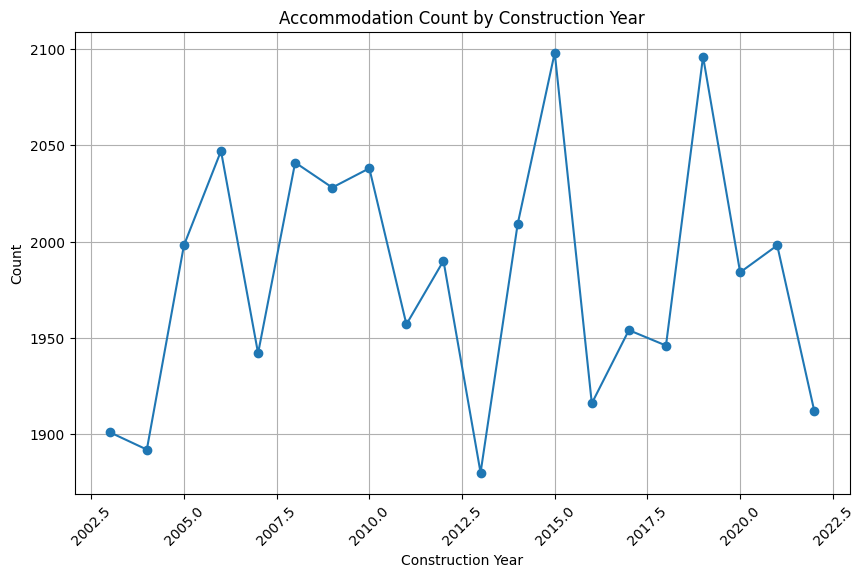

In [161]:
construction_year_count = dataset.groupby('Construction year')['price'].count()

# Create a line graph
plt.figure(figsize=(10, 6))
construction_year_count.plot(kind='line', marker='o')
plt.title('Accommodation Count by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [162]:
#2) Has there been increase in the number of instant bookable accommodation over the years?
room = dataset.groupby('Construction year')['room type'].value_counts()
roomDF = pd.DataFrame(room)
roomDF

room type
Construction year room type                 
2003.0            Entire home/apt       1020
                  Private room           852
                  Shared room             29
2004.0            Entire home/apt        927
                  Private room           914
                  Shared room             51
2005.0            Entire home/apt       1066
                  Private room           895
                  Shared room             37
2006.0            Entire home/apt       1018
                  Private room           993
                  Shared room             36
2007.0            Entire home/apt        993
                  Private room           894
                  Shared room             55
2008.0            Entire home/apt       1057
                  Private room           945
                  Shared room             39
2009.0            Entire home/apt       1061
                  Private room           916
                  Shared room             51
2010.0            Entire home/apt       1020
                  Private room           981
                  Shared room             37
2011.0            Entire home/apt        984
                  Private room           945
                  Shared room             28
2012.0            Entire home/apt       1018
                  Private room           932
                  Shared room             40
2013.0            Private room           951
                  Entire home/apt        890
                  Shared room             39
2014.0            Entire home/apt       1055
                  Private room           911
                  Shared room             43
2015.0            Entire home/apt       1043
                  Private room          1005
                  Shared room             50
2016.0            Entire home/apt        952
                  Private room           930
                  Shared room             34
2017.0            Entire home/apt        984
                  Private room           936
                  Shared room             34
2018.0            Private room           956
                  Entire home/apt        930
                  Shared room             60
2019.0            Entire home/apt       1151
                  Private room           903
                  Shared room             42
2020.0            Entire home/apt       1054
                  Private room           894
                  Shared room             36
2021.0            Entire home/apt        995
                  Private room           951
                  Shared room             52
2022.0            Entire home/apt        997
                  Private room           875
                  Shared room             40

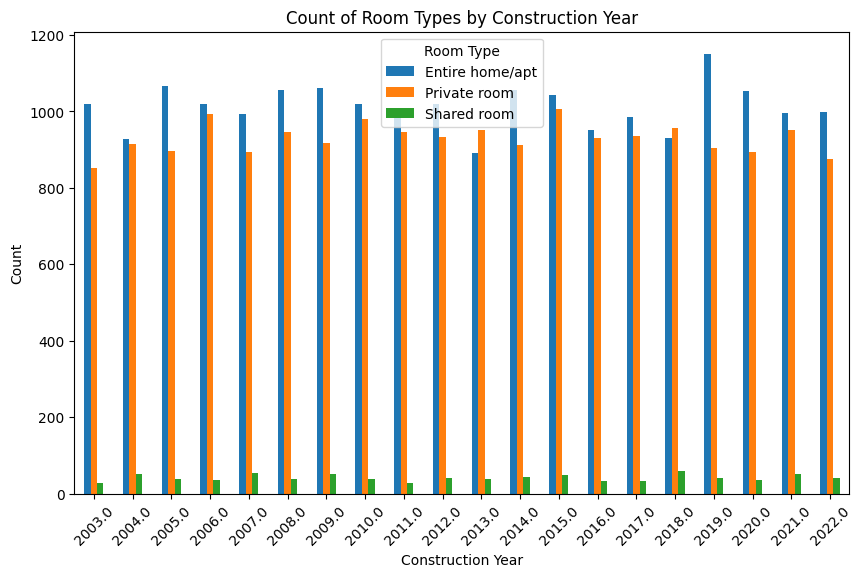

In [163]:
room_counts = dataset.groupby(['Construction year','room type'])['room type'].count().unstack()

#Plotting side-by-side bar chart
room_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Room Types by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

In [164]:
# Cancellationpolicy among the neighbourhood groups
cancel = dataset.groupby('neighbourhood group')['cancellation_policy'].value_counts()
cancelDF = pd.DataFrame(cancel)
cancelDF

cancellation_policy
neighbourhood group cancellation_policy                     
Bronx               strict                               315
                    flexible                             313
                    moderate                             303
Brooklyn            moderate                            5614
                    strict                              5595
                    flexible                            5536
Manhattan           moderate                            5681
                    strict                              5546
                    flexible                            5520
Queens              strict                              1665
                    moderate                            1606
                    flexible                            1572
Staten Island       flexible                             126
                    strict                               126
                    moderate                             109

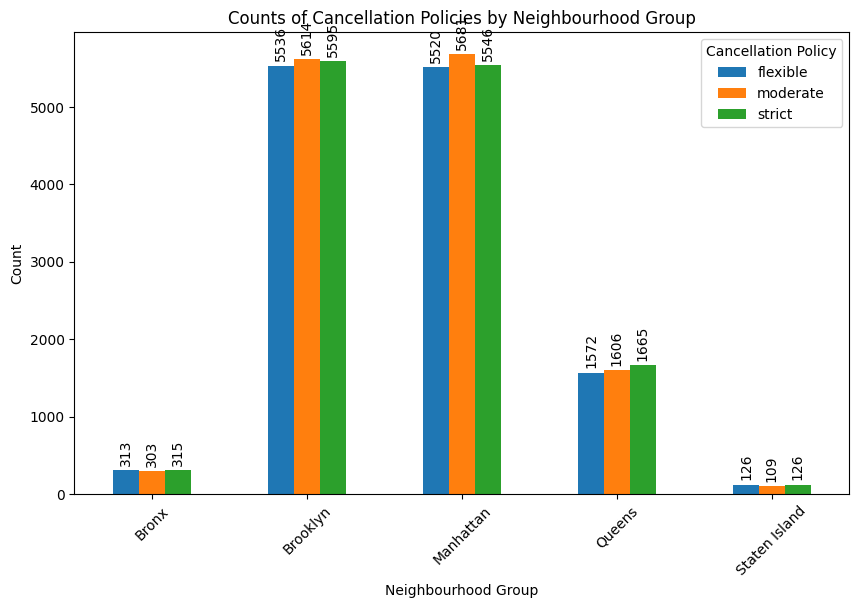

In [165]:
cancel_counts = dataset.groupby(['neighbourhood group','cancellation_policy'])['cancellation_policy'].count().unstack()

#Plotting side-by-side bar chart
ax = cancel_counts.plot(kind = 'bar', figsize=(10,6))
plt.title('Counts of Cancellation Policies by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Policy')

#Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)
plt.show()

In [166]:
# Among the room types
cancel = dataset.groupby(['neighbourhood group','room type'])['cancellation_policy'].value_counts()
cancelDF = pd.DataFrame(cancel)
cancelDF

cancellation_policy
neighbourhood group room type       cancellation_policy                     
Bronx               Entire home/apt flexible                             108
                                    strict                               108
                                    moderate                             103
                    Private room    flexible                             193
                                    moderate                             186
                                    strict                               185
                    Shared room     strict                                22
                                    moderate                              14
                                    flexible                              12
Brooklyn            Entire home/apt moderate                            2718
                                    strict                              2716
                                    flexible                            2657
                    Private room    moderate                            2801
                                    strict                              2794
                                    flexible                            2777
                    Shared room     flexible                             102
                                    moderate                              95
                                    strict                                85
Manhattan           Entire home/apt moderate                            3315
                                    flexible                            3268
                                    strict                              3241
                    Private room    moderate                            2247
                                    strict                              2187
                                    flexible                            2123
                    Shared room     flexible                             129
                                    moderate                             119
                                    strict                               118
Queens              Entire home/apt flexible                             631
                                    strict                               603
                                    moderate                             582
                    Private room    strict                              1017
                                    moderate                             985
                                    flexible                             892
                    Shared room     flexible                              49
                                    strict                                45
                                    moderate                              39
Staten Island       Entire home/apt strict                                63
                                    moderate                              54
                                    flexible                              48
                    Private room    flexible                              77
                                    strict                                62
                                    moderate                              53
                    Shared room     moderate                               2
                                    flexible                               1
                                    strict                                 1

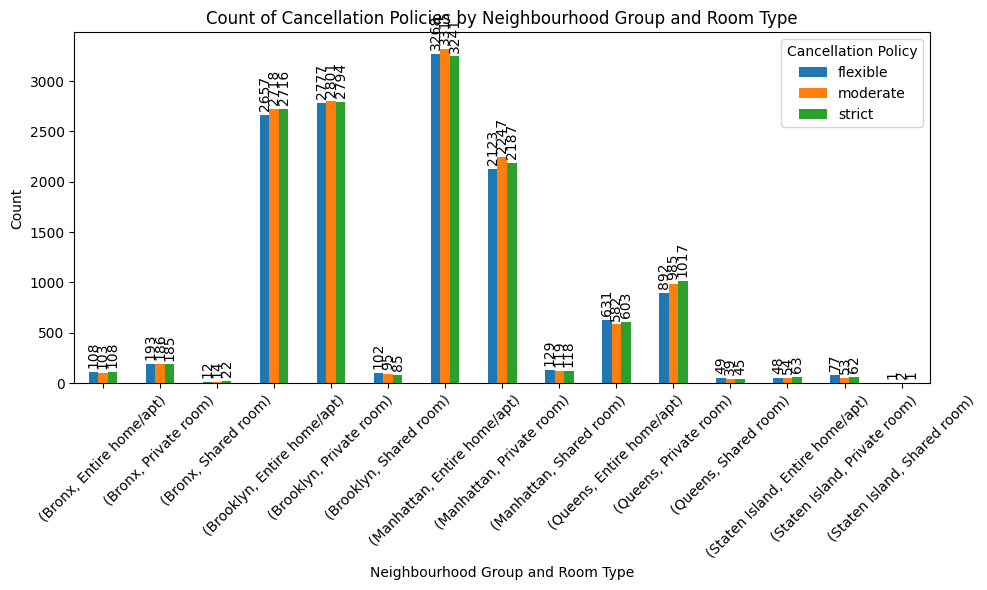

In [167]:
cancel_counts = dataset.groupby(['neighbourhood group','room type','cancellation_policy'])['cancellation_policy'].count().unstack()

# Plotiing side-by-side bar chart
ax = cancel_counts.plot(kind='bar', figsize=(10,6))
plt.title('Count of Cancellation Policies by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group and Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Policy')

#Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3, rotation=90)

plt.tight_layout()
plt.show()

In [168]:
#Neighbourhood groupsvs count of neighbourhood
counts = dataset.groupby('neighbourhood group')['neighbourhood'].count()
countsDF = pd.DataFrame(counts)
countsDF.columns = ['Count']
countsDF

,Count
neighbourhood group,
Bronx,931
Brooklyn,16745
Manhattan,16747
Queens,4843
Staten Island,361


Highest neighbourhood are there for group Manhattan which indicates its more developed and habitual

In [169]:
def plot_bar_chart(column_name: str, 
                   hue: str = None, 
                   top_values: int = None, 
                   palette: str = 'flare', 
                   show_grid : bool = True,
                  figsize: tuple = (16, 9),
                  bar_font_size: int = 14,
                  bar_angle: int=45,
                  angle: int=45):
    fig = plt.figure(facecolor = (247/255,247/255,247/255), figsize = figsize)
    ax = plt.subplot(1,1,1)
    ax.set_facecolor((247/255,247/255,247/255))
    counts = None
    
    if top_values is not None:
        counts = dataset[column_name].value_counts().iloc[:top_values]
    else:
        counts = dataset[column_name].value_counts()
    
    bar_ax = sns.barplot(x = counts.keys(), y = counts, palette = palette, ax = ax, hue = df[hue] if hue is not None else None)
    
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize = bar_font_size)
    
    plt.xticks(rotation = angle, fontsize = 14)
    plt.xlabel(f"{column_name}", fontweight='bold', fontsize = 18)
    plt.ylabel("count", fontweight="bold", fontsize=18)
    plt.title(f"Top{top_values}{column_name}" if top_values is not None else f"{column_name}", fontsize=27)
    if show_grid: plt.grid()
    plt.show()

def plot_pie_chart(column_name: str, startangle: int=45, loc:str="center", palette:str="flare", explodes:float=0.09, colors:list = None):
    values = dataset[column_name].value_counts()
    keys = values.keys()
    total_records = dataset[column_name].count()
    
    labels = ["{0} - {1:1.2f}%".format(i,j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]
    
    plt.subplots(figsize = (16,9))
    
    # draw the pie chart
    patches, texts = plt.pie(values, startangle = startangle, explode = explodes, colors = colors)
    
    #draw circle
    center_circle = plt.Circle(xy = (0,0), radius = 0.70, fc = "white")
    fig = plt.gcf()
    
    plt.title(column_name, fontsize = 25, fontweight = "bold")
    plt.legend(patches, labels, loc=loc, fontsize = 14)
    plt.show()

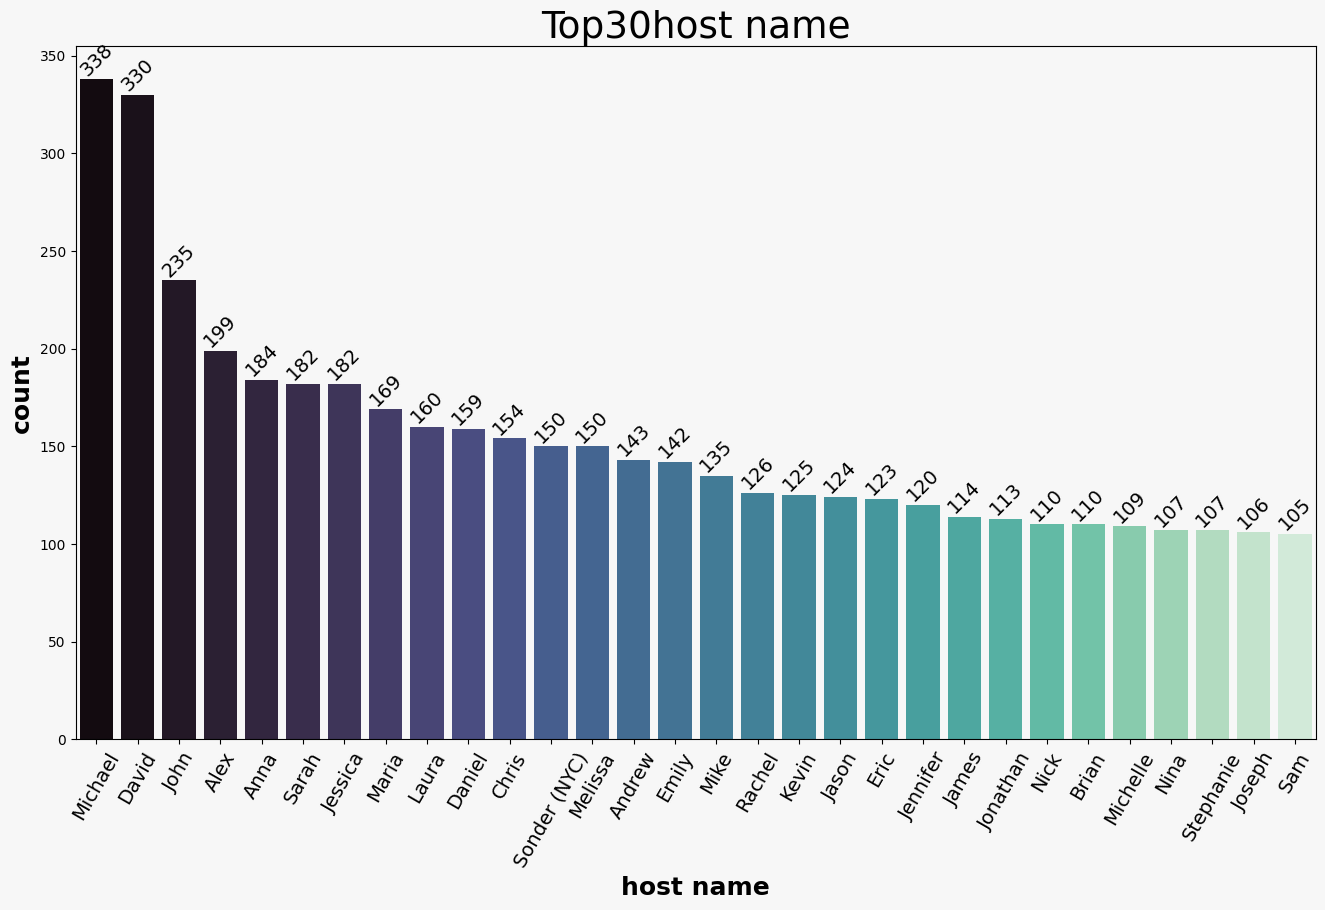

In [170]:
plot_bar_chart("host name", top_values = 30, palette = "mako", show_grid = False, angle = 60)

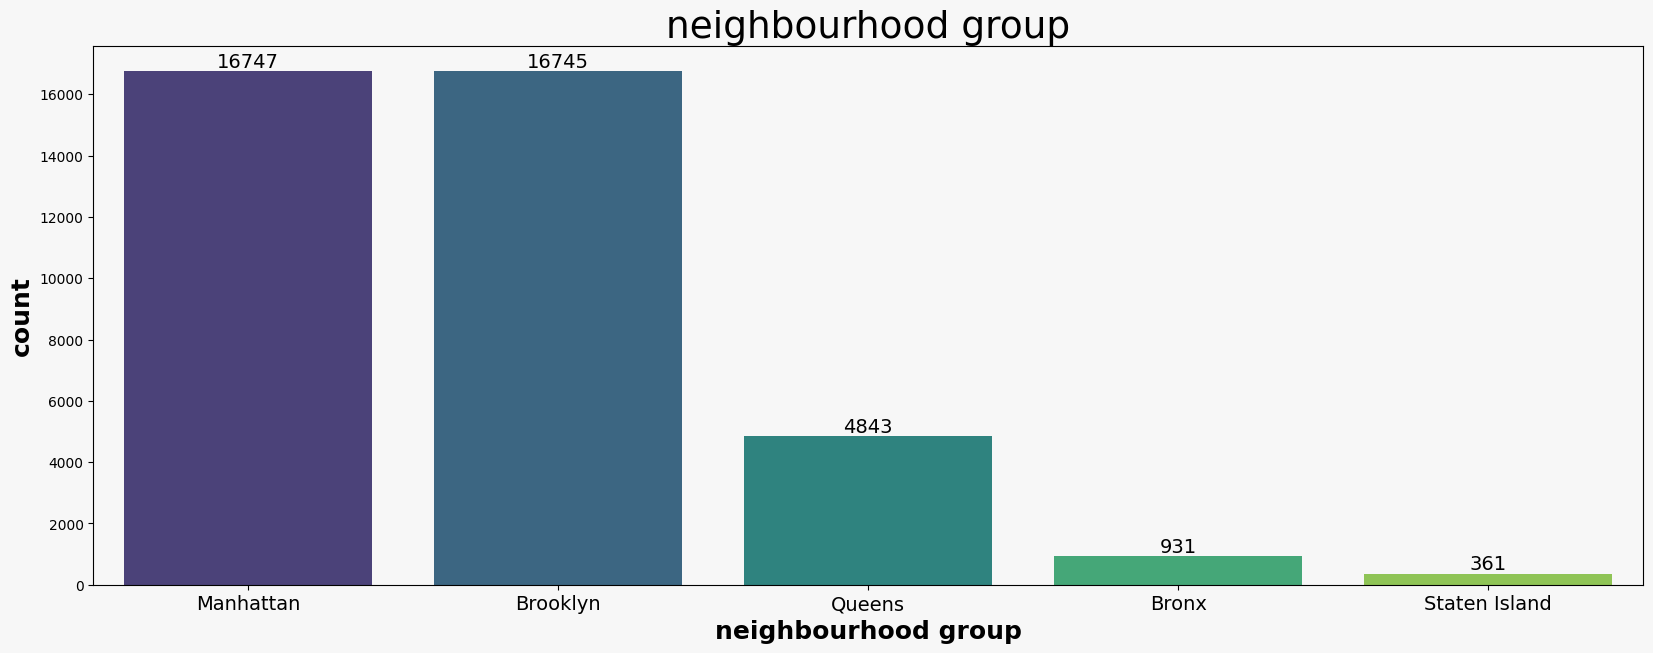

In [171]:
plot_bar_chart("neighbourhood group", palette = "viridis", show_grid = False, bar_angle = 0, figsize = (20, 7), angle=0)

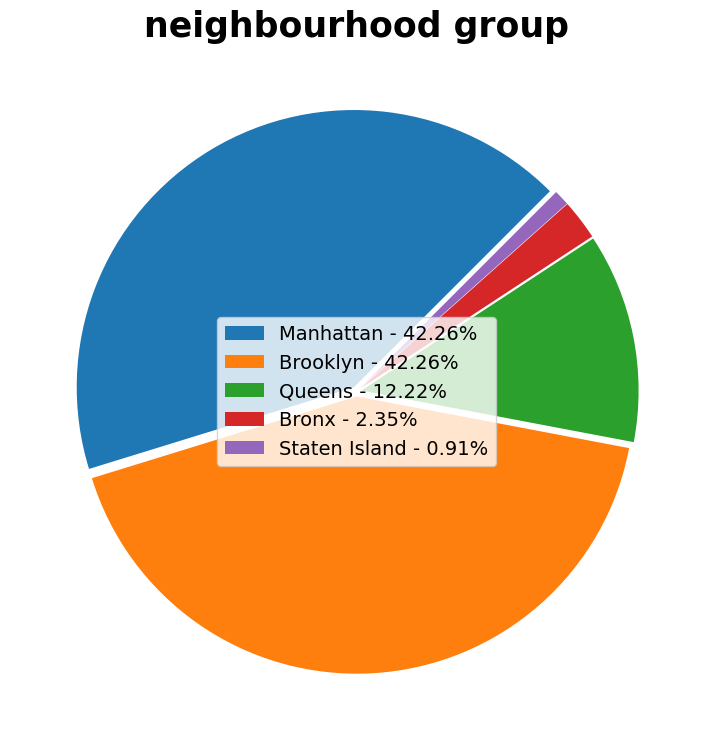

In [172]:
plot_pie_chart("neighbourhood group", explodes = 0.09, palette = 'viridis')

In [173]:
dataset.to_csv('output.csv', index = False)

In [174]:
dataset['house_rules']

0         Clean up and treat the home the way you'd like...
1         Pet friendly but please confirm with me if the...
4         Please no smoking in the house, porch or on th...
5                         No smoking, please, and no drugs.
7         House Guidelines for our BnB We are delighted ...
                                ...                        
102587    • Check-in time is 2PM. Check-out time is 11am...
102588     Keep the apartment clean and damage free please.
102591                                               #NAME?
102593    * No smoking indoors.  * No pets  * No loud/la...
102595    House rules: Guests agree to the following ter...
Name: house_rules, Length: 39627, dtype: object

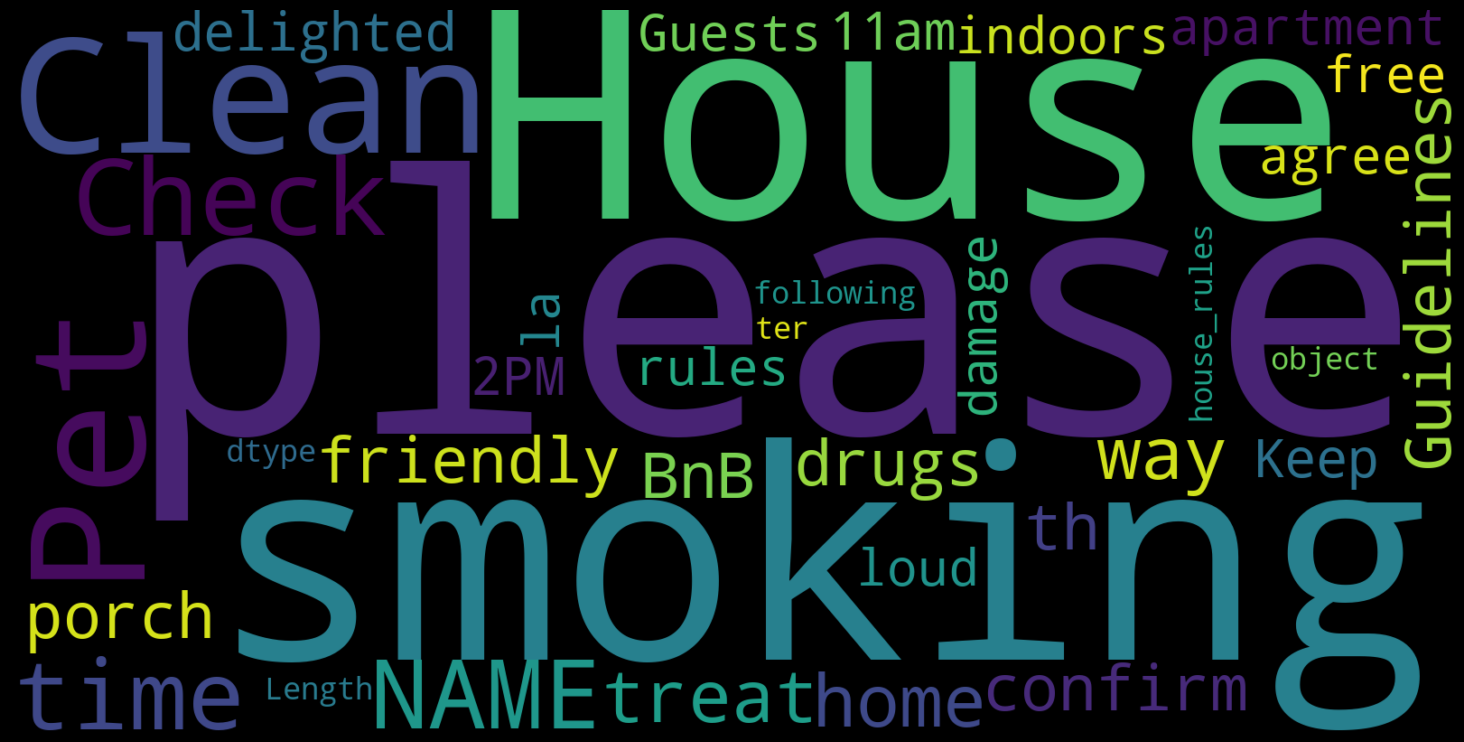

In [175]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)

# Generate word cloud cloud using df_yelp_tip_top['text_clear']
wc.generate(str(dataset['house_rules']))

# declare our figure
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)

#after lot of congiguration finally plot the graph
plt.show()

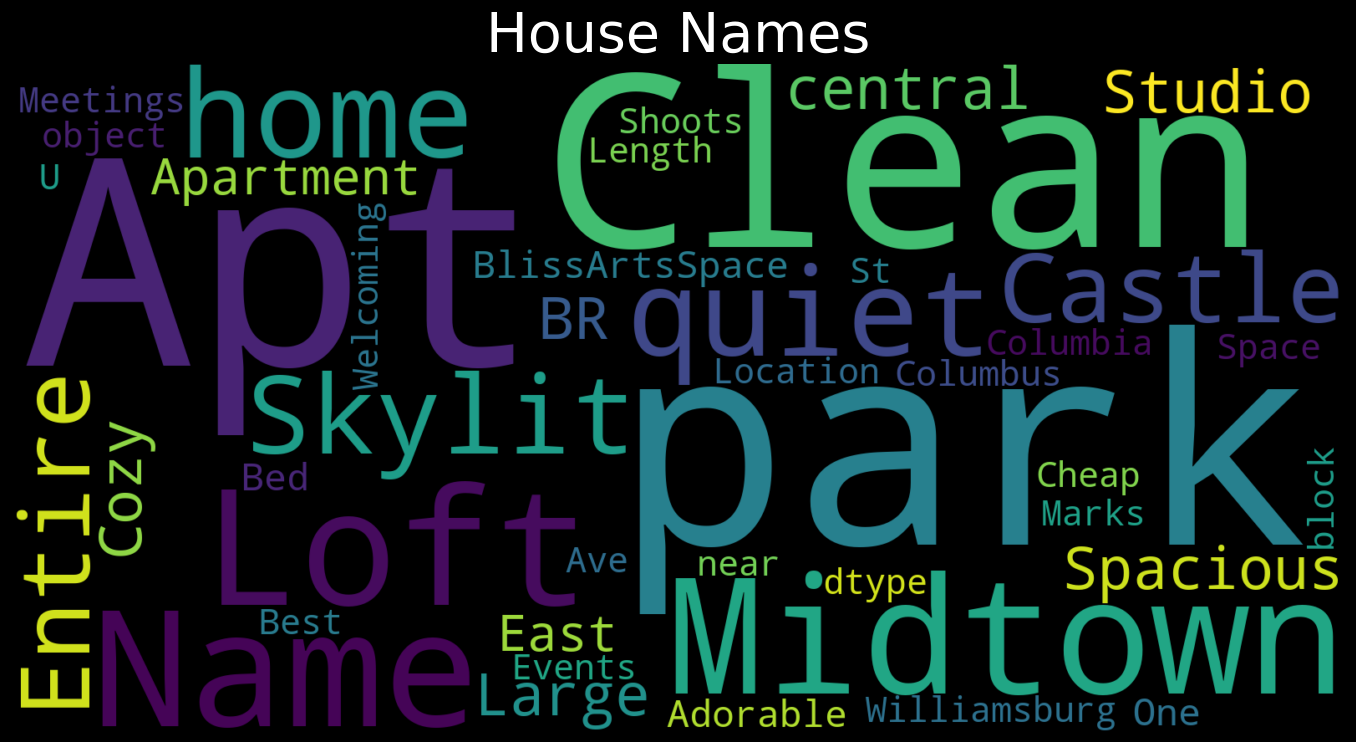

In [176]:
wc = WordCloud(width=1600, height=800, random_state=1, max_words=20000000)

#generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(dataset['NAME']))

# declare our figure
plt.figure(figsize=(20,10), facecolor='k')
plt.title("House Names", fontsize=40, color="white")
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)

# after lot of congiguration finally plot the graph
plt.show()